<a href="https://colab.research.google.com/github/ugurtalas/SezgiselOtimizasyonDersNotlari/blob/main/GWO_RastRigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iterasyon 1
Alpha: [0.36930744 2.09924983], Beta: [1.9589957  4.23992202], Delta: [ 2.58984467 -0.32772596]
Kurt Pozisyonları: [[ 0.66023655  0.95029742]
 [ 2.75067979  4.28496465]
 [ 2.68038751  5.12      ]
 [-3.09680745  0.41910696]
 [-0.49310222  0.72444568]]


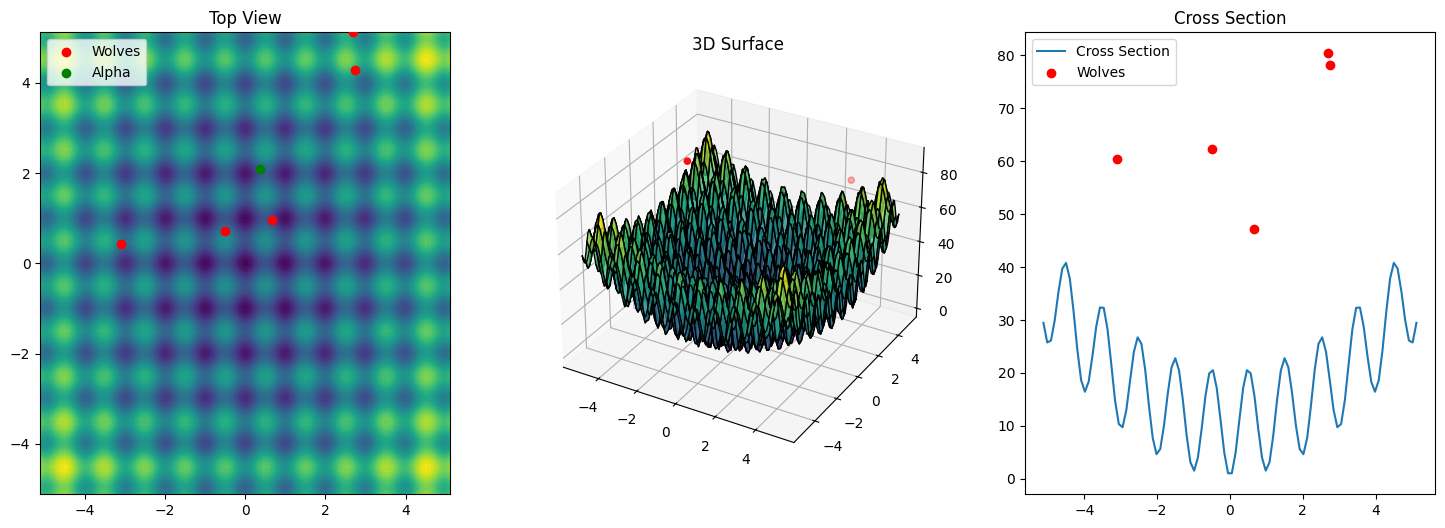

Iterasyon 2
Alpha: [0.66023655 0.95029742], Beta: [-3.09680745  0.41910696], Delta: [-0.49310222  0.72444568]
Kurt Pozisyonları: [[-1.34987475  0.33957234]
 [-4.0429497  -3.60248262]
 [-0.20173348  1.39611267]
 [ 0.32864581  0.87331677]
 [-1.40830191  0.61804274]]


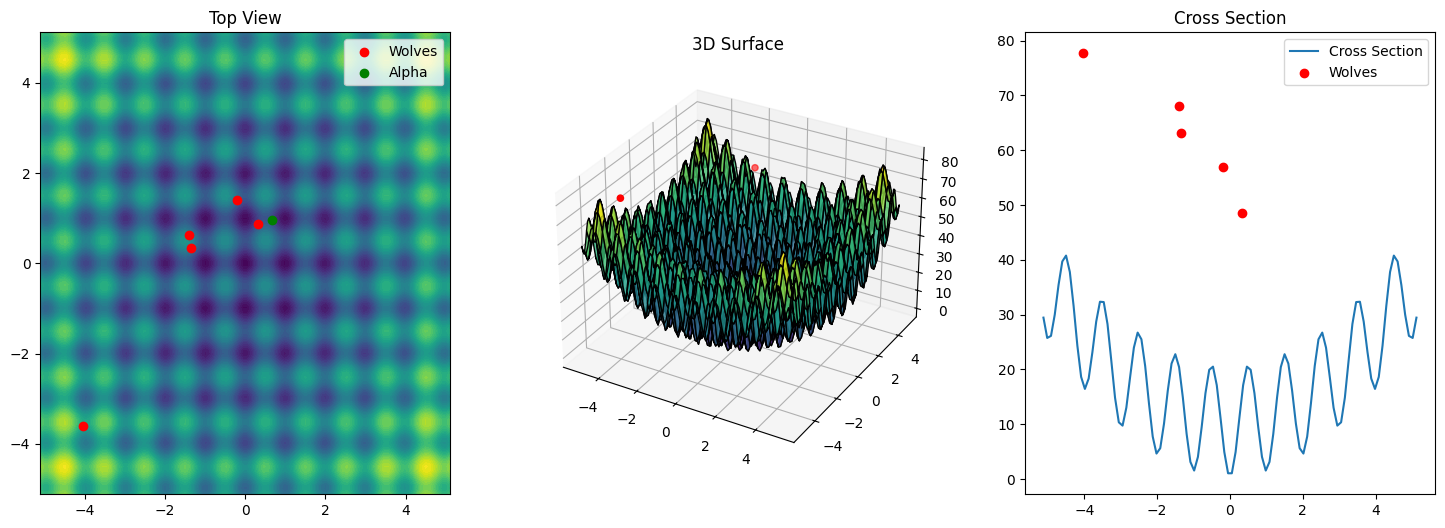

Iterasyon 3
Alpha: [0.32864581 0.87331677], Beta: [-0.20173348  1.39611267], Delta: [-1.34987475  0.33957234]
Kurt Pozisyonları: [[-0.57325519  0.54633995]
 [-0.36143285  1.36465517]
 [-0.53860876  0.21348931]
 [-0.49538597  1.12890889]
 [-0.49445338  1.00306017]]


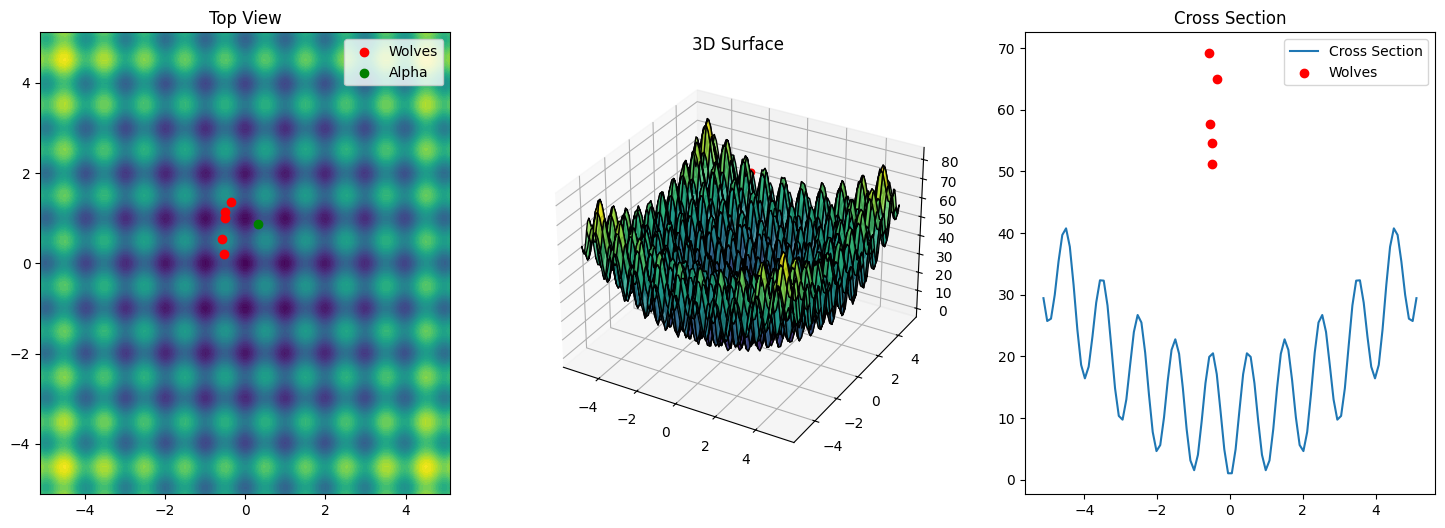

Iterasyon 4
Alpha: [-0.49445338  1.00306017], Beta: [-0.49538597  1.12890889], Delta: [-0.53860876  0.21348931]
Kurt Pozisyonları: [[-0.4359448   0.89162592]
 [-0.48882747  0.71188071]
 [-0.59355464  0.13141316]
 [-0.36590277  1.34706746]
 [-0.47707871  0.8117604 ]]


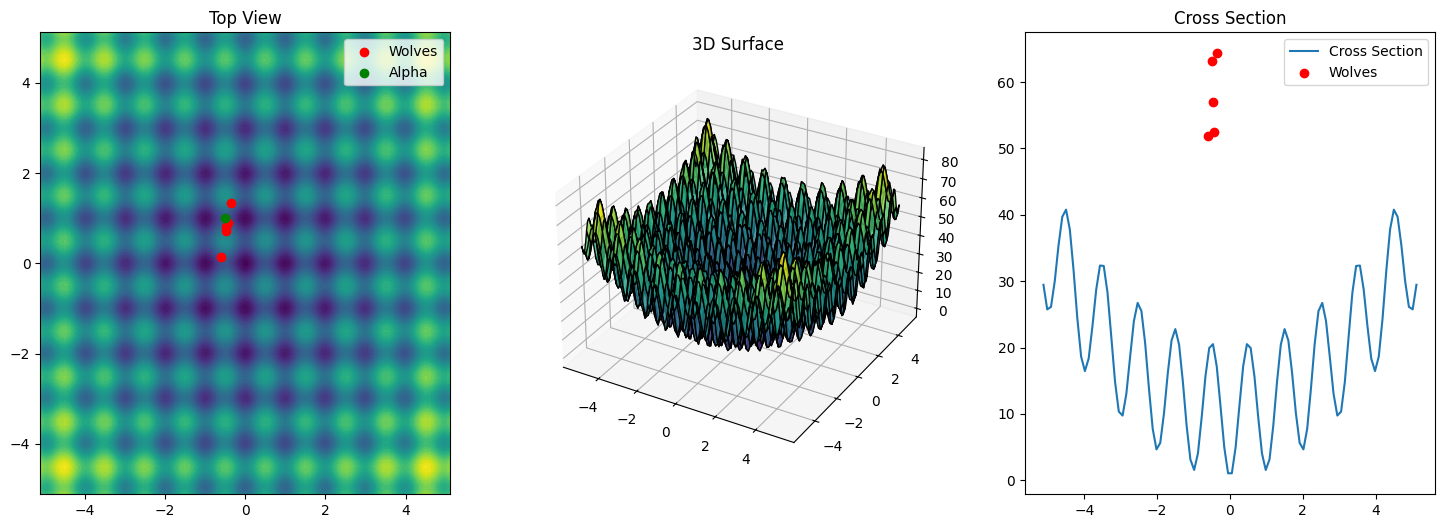

Iterasyon 5
Alpha: [-0.59355464  0.13141316], Beta: [-0.4359448   0.89162592], Delta: [-0.47707871  0.8117604 ]
Kurt Pozisyonları: [[-0.57243305  0.54050158]
 [-0.48496559  0.92085432]
 [-0.36319396  0.53413039]
 [-0.49194523  0.8355586 ]
 [-0.43447148  0.72058563]]


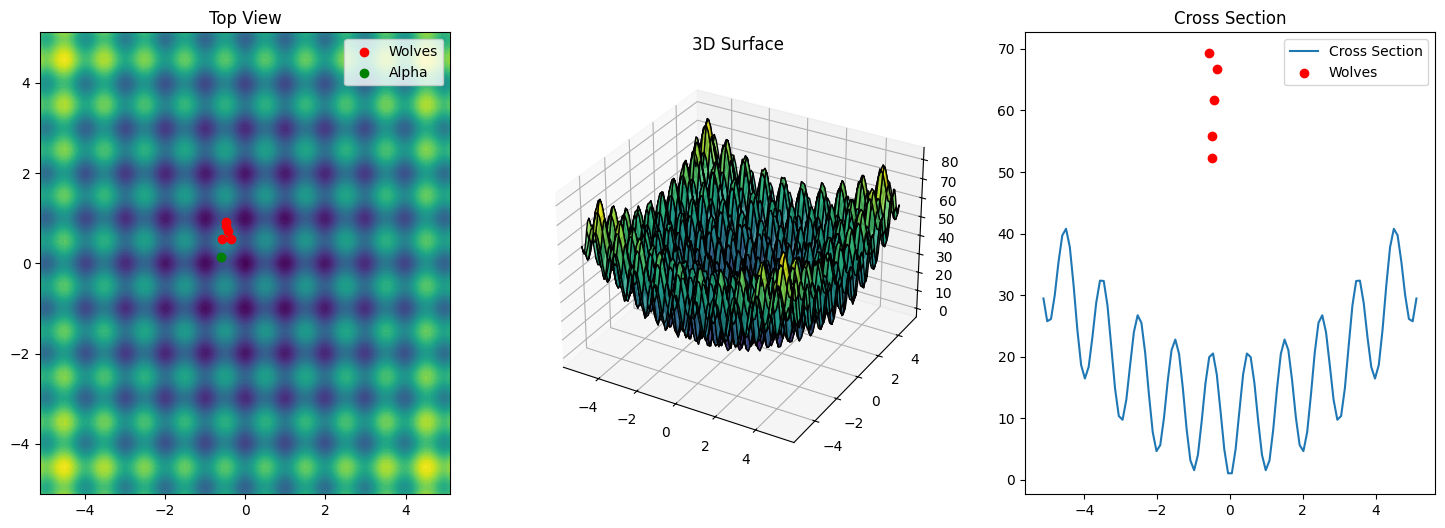

Iterasyon 6
Alpha: [-0.48496559  0.92085432], Beta: [-0.49194523  0.8355586 ], Delta: [-0.43447148  0.72058563]
Kurt Pozisyonları: [[-0.58046244  0.72529917]
 [-0.50666511  0.72504609]
 [-0.58941402  0.57243247]
 [-0.51888839  0.71452627]
 [-0.33071983  1.05341833]]


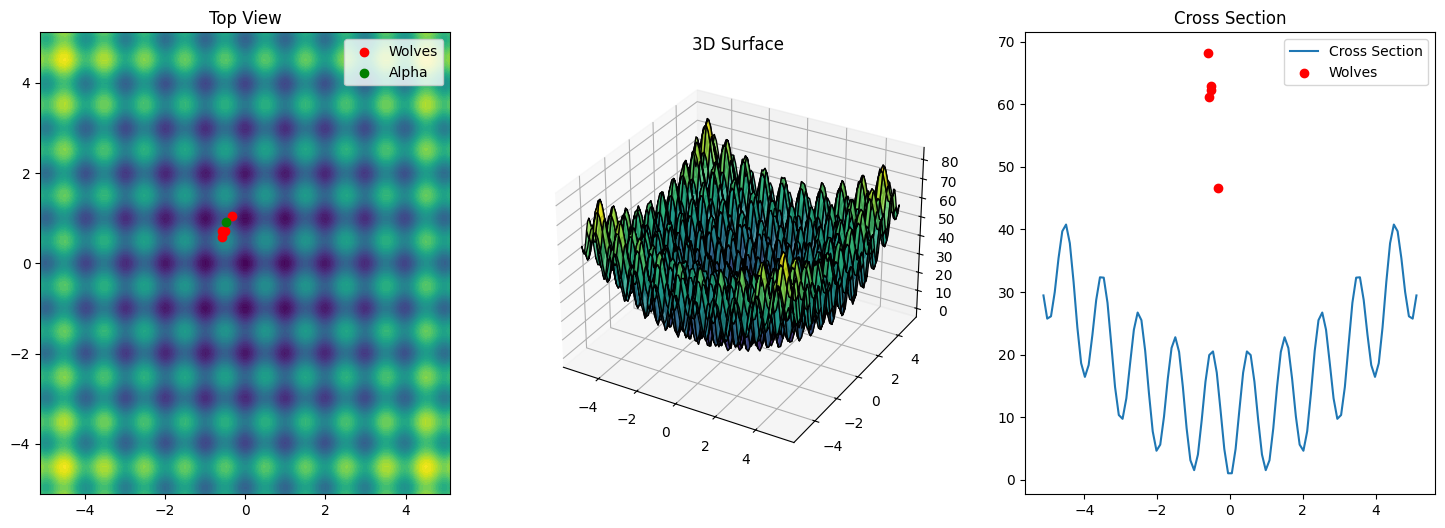

Iterasyon 7
Alpha: [-0.33071983  1.05341833], Beta: [-0.58046244  0.72529917], Delta: [-0.50666511  0.72504609]
Kurt Pozisyonları: [[-0.45979083  1.04890268]
 [-0.52303581  0.85633213]
 [-0.36320109  0.90849776]
 [-0.40567828  0.84374021]
 [-0.66915904  0.72521155]]


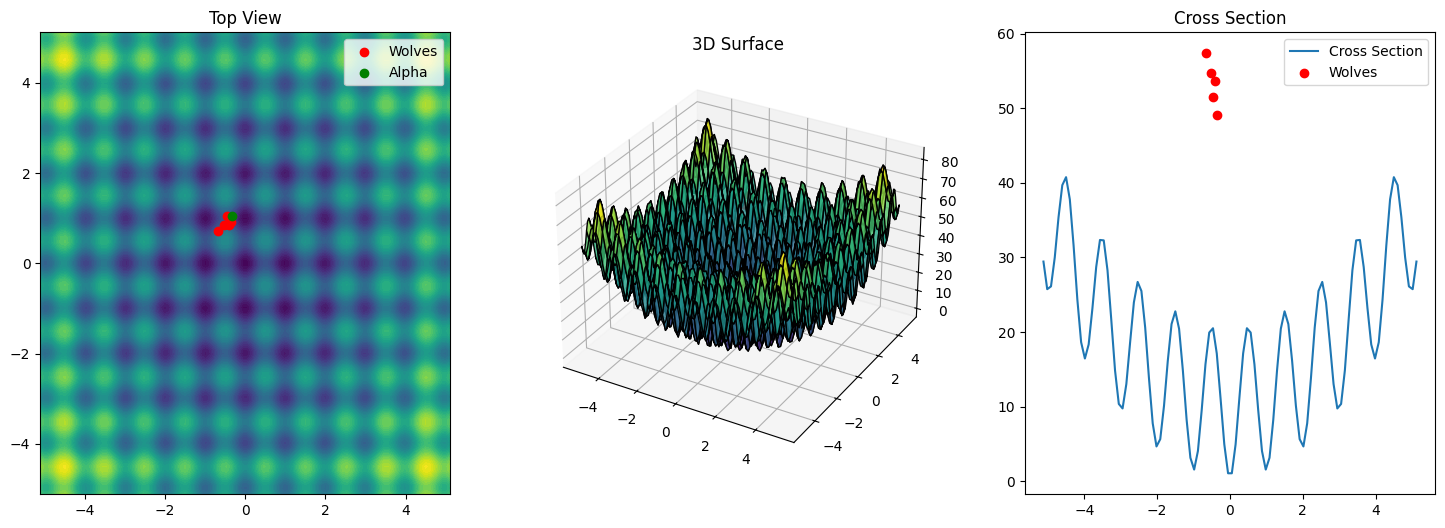

Iterasyon 8
Alpha: [-0.36320109  0.90849776], Beta: [-0.45979083  1.04890268], Delta: [-0.40567828  0.84374021]
Kurt Pozisyonları: [[-0.44636245  0.84960449]
 [-0.327829    1.06264658]
 [-0.51686929  0.70200861]
 [-0.40654596  0.89452402]
 [-0.46394092  0.84488484]]


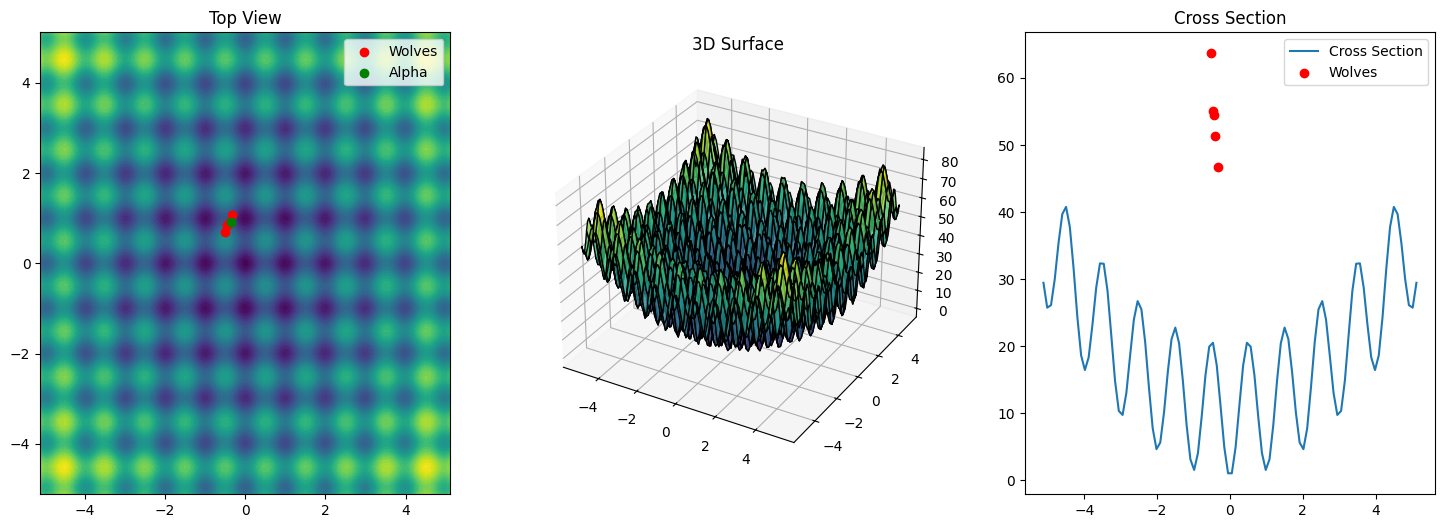

Iterasyon 9
Alpha: [-0.327829    1.06264658], Beta: [-0.40654596  0.89452402], Delta: [-0.44636245  0.84960449]
Kurt Pozisyonları: [[-0.37267743  0.99104533]
 [-0.44150083  0.8274989 ]
 [-0.43158333  0.89497186]
 [-0.44059631  0.78942035]
 [-0.3699491   0.96884167]]


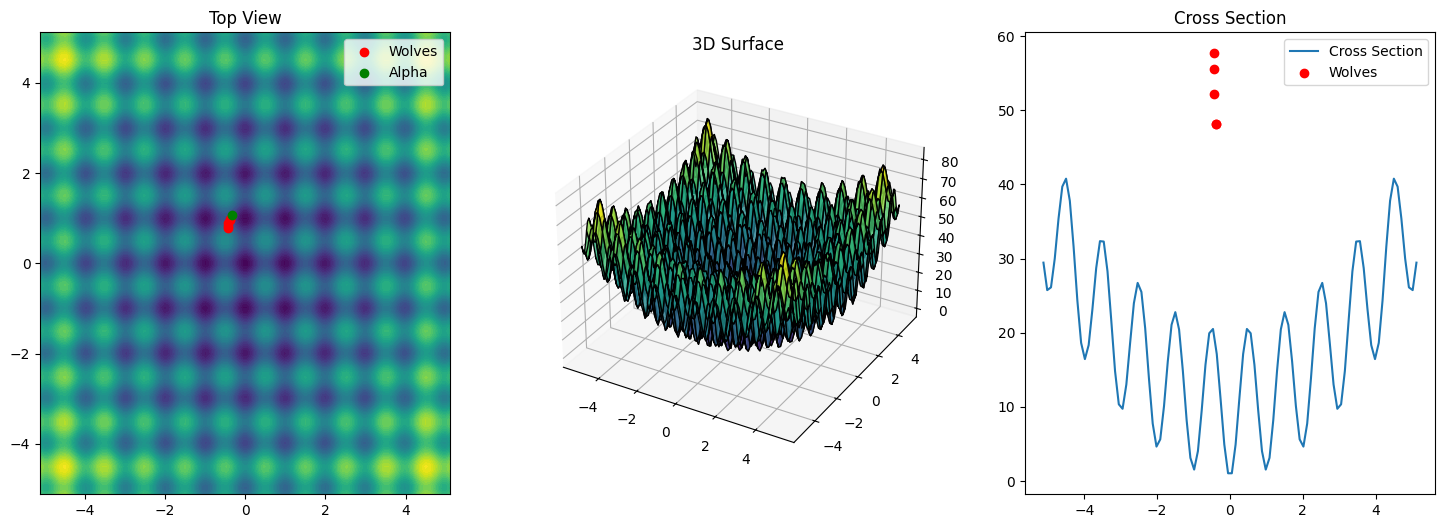

Iterasyon 10
Alpha: [-0.37267743  0.99104533], Beta: [-0.3699491   0.96884167], Delta: [-0.43158333  0.89497186]
Kurt Pozisyonları: [[-0.37700457  0.96806965]
 [-0.37606786  1.00196624]
 [-0.3781527   1.01258579]
 [-0.38967646  0.95980738]
 [-0.3756572   0.99321215]]


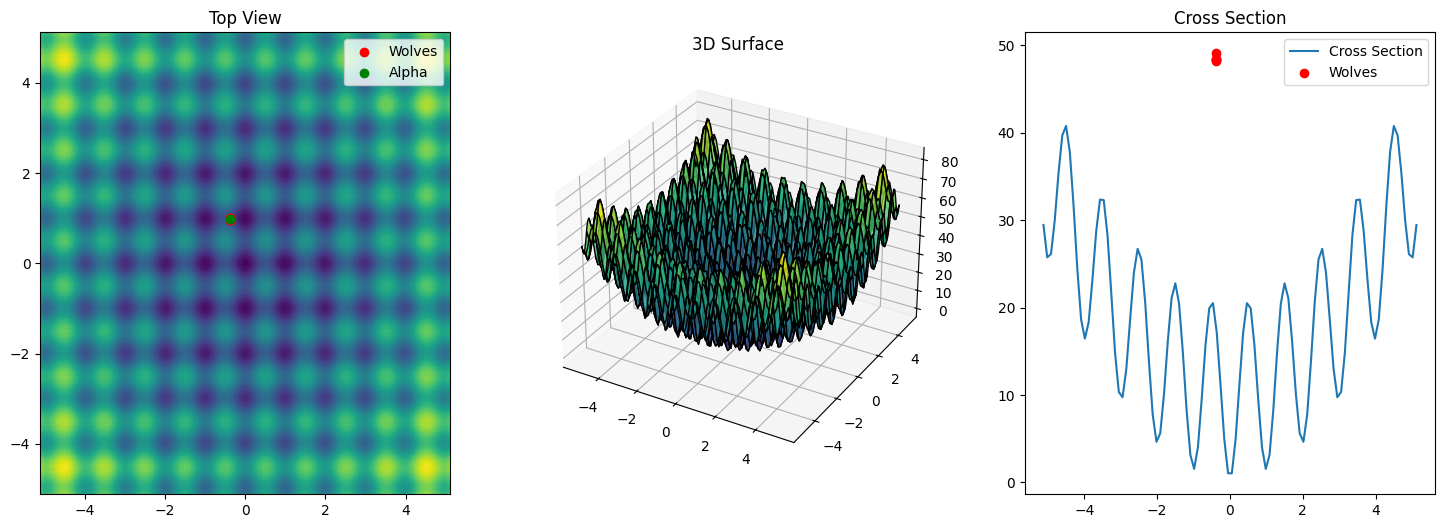

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rastrigin fonksiyonu
def rastrigin_function(x):
    x = np.array(x)
    return 10 * x.shape[0] + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=1)

# GWO Algoritması
def grey_wolf_optimizer(func, n_wolves=5, n_iterations=10, bounds=(-5.12, 5.12)):
    # Başlangıç popülasyonu (rastgele kurt pozisyonları)
    wolves_positions = np.random.uniform(bounds[0], bounds[1], (n_wolves, 2))  # 2 boyutlu Rastrigin için

    for iteration in range(n_iterations):
        # Fonksiyon değerlerini hesapla
        fitness = func(wolves_positions)

        # Kurtları sıralama (en iyi çözüme doğru sıralama)
        sorted_indices = np.argsort(fitness)
        alpha, beta, delta = wolves_positions[sorted_indices[:3]]

        # Yeni pozisyonları güncelle
        a = 2 - iteration * (2 / n_iterations)  # a parametresi lineer azalma
        new_positions = np.zeros_like(wolves_positions)

        for i in range(n_wolves):
            r1, r2 = np.random.uniform(0, 1, 2)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2

            r1, r2 = np.random.uniform(0, 1, 2)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2

            r1, r2 = np.random.uniform(0, 1, 2)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2

            D_alpha = abs(C1 * alpha - wolves_positions[i])
            D_beta = abs(C2 * beta - wolves_positions[i])
            D_delta = abs(C3 * delta - wolves_positions[i])

            X1 = alpha - A1 * D_alpha
            X2 = beta - A2 * D_beta
            X3 = delta - A3 * D_delta

            new_positions[i] = (X1 + X2 + X3) / 3

        # Pozisyonları güncelle (bounds'a dikkat ederek)
        #wolves_positions = np.clip(new_positions, bounds[0], bounds[1])

        wolves_positions = np.clip(new_positions, bounds[0], bounds[1])  # Sınır kontrolü
        fitness = np.clip(fitness, -1e10, 1e10)  # Fitness sonuçlarını sınırla

        # Her iterasyonun sonuçlarını yazdır
        print(f"Iterasyon {iteration + 1}")
        print(f"Alpha: {alpha}, Beta: {beta}, Delta: {delta}")
        print(f"Kurt Pozisyonları: {wolves_positions}")

        # 3D Rastrigin Grafiği
        x = np.linspace(bounds[0], bounds[1], 100)
        y = np.linspace(bounds[0], bounds[1], 100)
        X, Y = np.meshgrid(x, y)
        Z = 10 * 2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))

        fig = plt.figure(figsize=(18, 6))

        # Tepeden görünüm (kontur)
        ax1 = fig.add_subplot(131)
        ax1.contourf(X, Y, Z, levels=50, cmap="viridis")
        ax1.scatter(wolves_positions[:, 0], wolves_positions[:, 1], color="red", label="Wolves", zorder=5)
        ax1.scatter(alpha[0], alpha[1], color="green", label="Alpha", zorder=5)
        ax1.set_title("Top View")
        ax1.legend()

        # 3D yüzey grafiği
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.plot_surface(X, Y, Z, cmap="viridis", edgecolor="k", alpha=0.8)
        ax2.scatter(wolves_positions[:, 0], wolves_positions[:, 1], fitness, color="red", label="Wolves", zorder=5)
        ax2.set_title("3D Surface")

        # Kesit (sadece x ekseni için)
        mid_y = int(len(y) / 2)
        ax3 = fig.add_subplot(133)
        ax3.plot(x, Z[mid_y, :], label="Cross Section")
        ax3.scatter(wolves_positions[:, 0], func(wolves_positions), color="red", label="Wolves", zorder=5)
        ax3.set_title("Cross Section")
        ax3.legend()

        plt.show()

    return alpha, func(alpha)

# GWO'yu çalıştırma
best_position, best_value = grey_wolf_optimizer(rastrigin_function)
print(f"En iyi pozisyon: {best_position}, En iyi değer: {best_value}")


Iterasyon 1
Alpha: [1.28584304 0.97515822], Beta: [0.06882439 3.40576153], Delta: [-3.91974985 -3.70153488]
Kurt Pozisyonları: [[ 0.17449675  0.40326837]
 [-2.49450677 -2.84996383]
 [-1.5695819  -0.7486753 ]
 [-0.92174121 -4.3149769 ]
 [-0.6273906   4.05877644]]


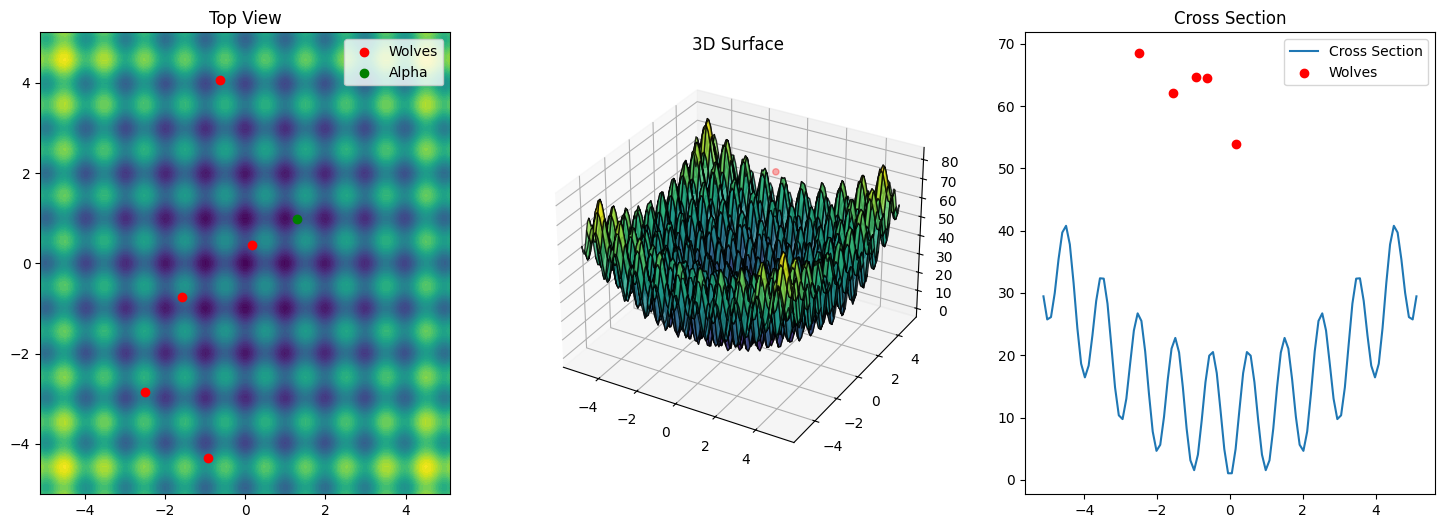

Iterasyon 2
Alpha: [0.17449675 0.40326837], Beta: [-1.5695819 -0.7486753], Delta: [-0.6273906   4.05877644]
Kurt Pozisyonları: [[-0.40523601  1.05190026]
 [ 0.75639788  4.7522328 ]
 [-0.53128     0.57640925]
 [-0.44553891  1.32713017]
 [-0.98760063 -0.70366979]]


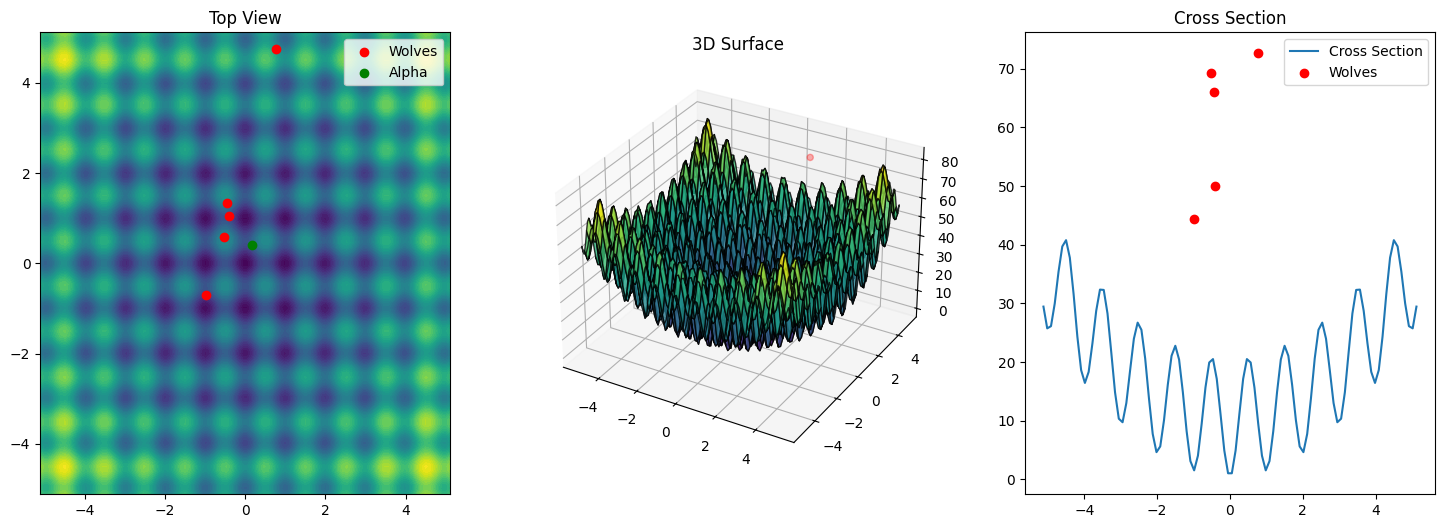

Iterasyon 3
Alpha: [-0.98760063 -0.70366979], Beta: [-0.40523601  1.05190026], Delta: [-0.44553891  1.32713017]
Kurt Pozisyonları: [[-0.05477562  1.62939388]
 [-1.67460623 -1.59670544]
 [-0.62737925  0.81090131]
 [-0.67789687  0.30124672]
 [ 0.25219596  2.13705108]]


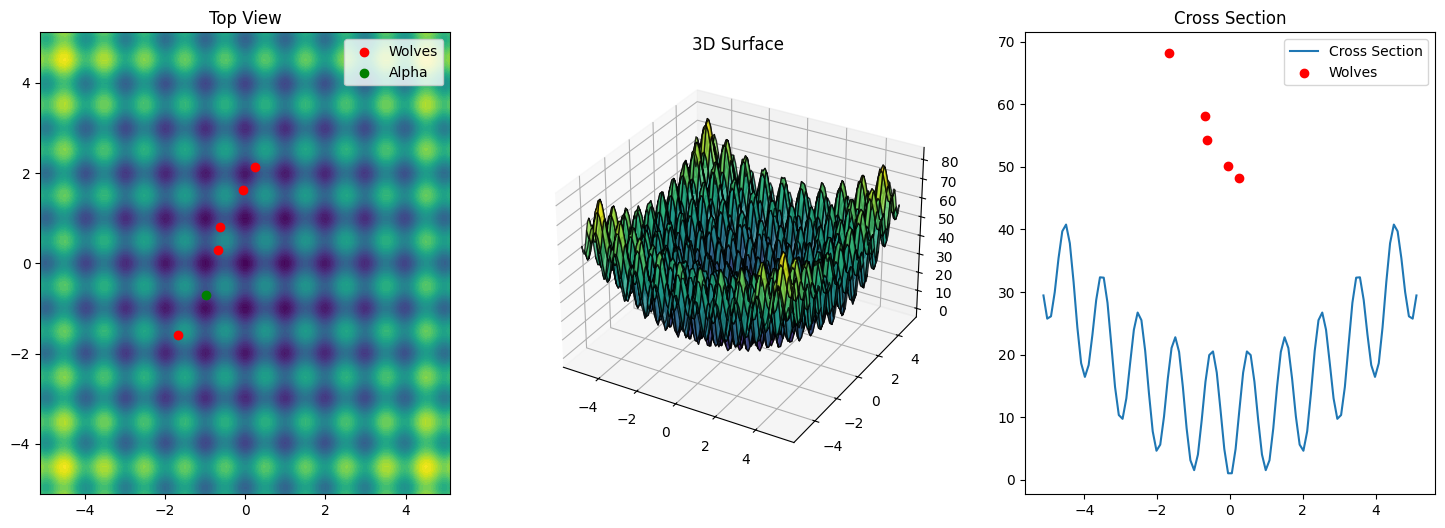

Iterasyon 4
Alpha: [0.25219596 2.13705108], Beta: [-0.05477562  1.62939388], Delta: [-0.62737925  0.81090131]
Kurt Pozisyonları: [[-0.21418555  1.47616069]
 [-0.02332535  2.05337471]
 [-0.65405217  0.43853992]
 [-0.17090986  1.3268925 ]
 [ 0.0444904   2.12908993]]


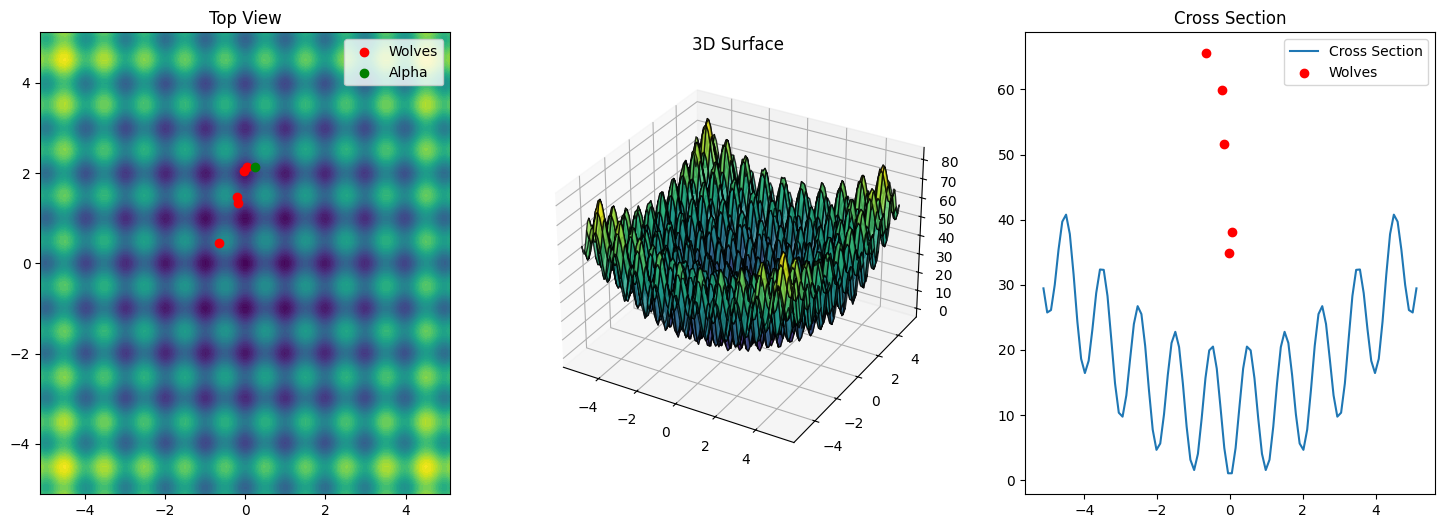

Iterasyon 5
Alpha: [-0.02332535  2.05337471], Beta: [0.0444904  2.12908993], Delta: [-0.17090986  1.3268925 ]
Kurt Pozisyonları: [[ 0.07829136  2.31126275]
 [-0.04810868  1.70951824]
 [-0.05937928  2.07029926]
 [ 0.03459399  2.81306676]
 [ 0.04173355  1.90917312]]


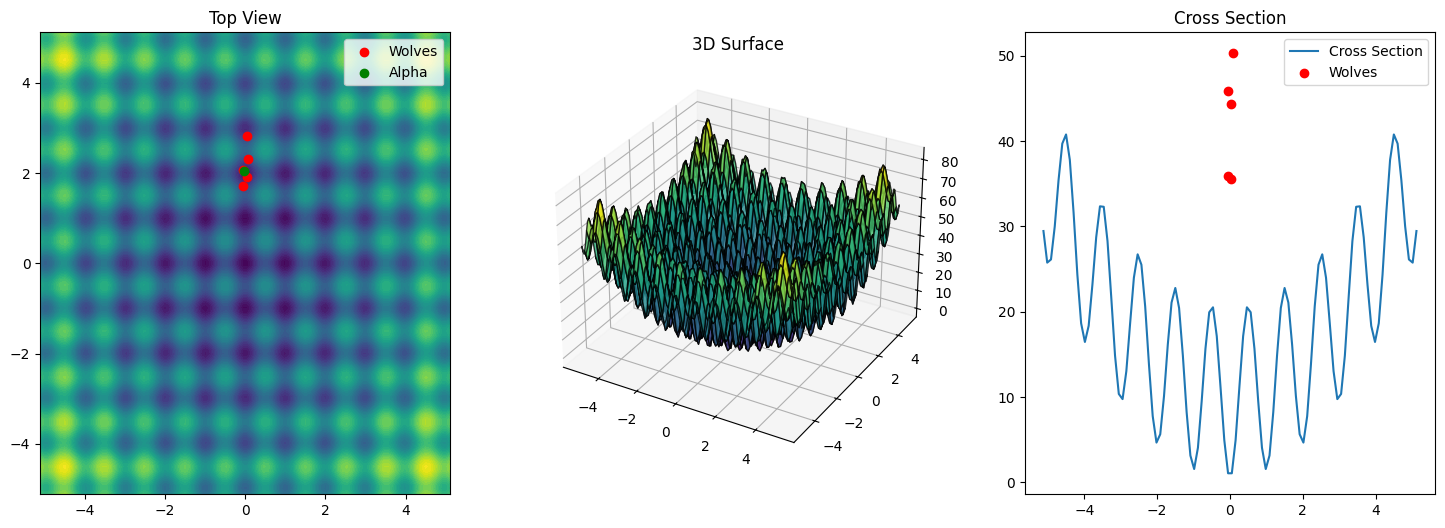

Iterasyon 6
Alpha: [0.04173355 1.90917312], Beta: [-0.05937928  2.07029926], Delta: [0.03459399 2.81306676]
Kurt Pozisyonları: [[ 1.81850815e-03  2.00774719e+00]
 [ 1.45566416e-02  2.27730730e+00]
 [-3.90644359e-03  2.20803105e+00]
 [-2.33095844e-02  2.27260848e+00]
 [ 2.46848205e-02  2.16510902e+00]]


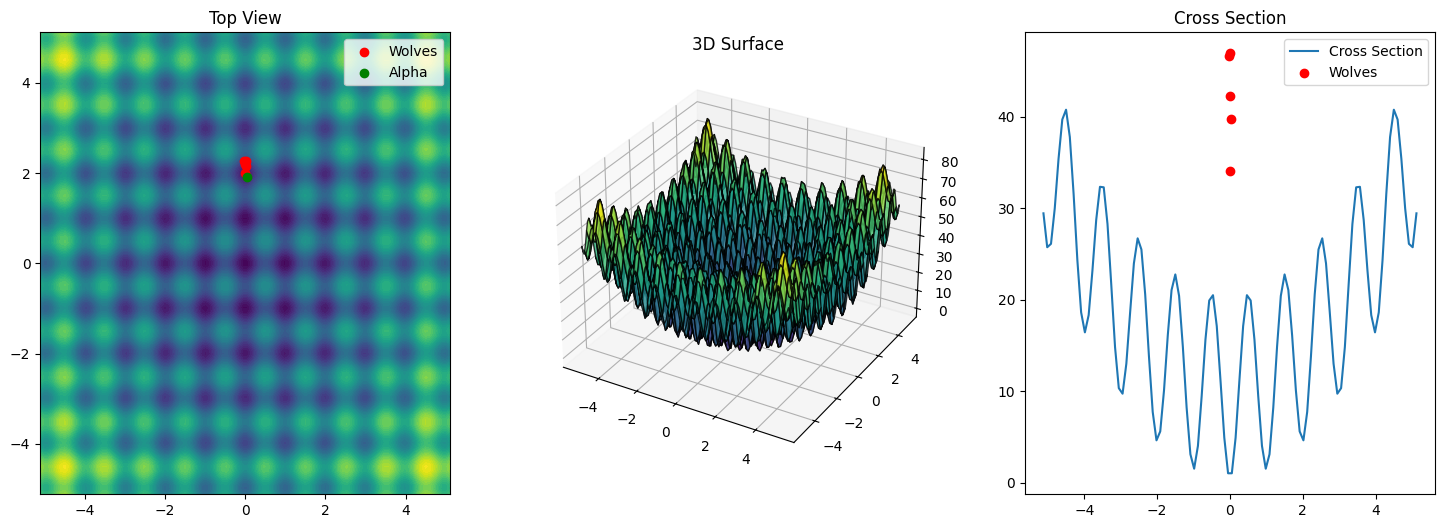

Iterasyon 7
Alpha: [1.81850815e-03 2.00774719e+00], Beta: [0.02468482 2.16510902], Delta: [-0.00390644  2.20803105]
Kurt Pozisyonları: [[ 5.77310185e-03  1.68354245e+00]
 [-2.12775338e-03  1.48335861e+00]
 [ 4.90179278e-03  2.04252186e+00]
 [ 4.45338537e-03  2.15186429e+00]
 [ 9.80955527e-03  2.49959176e+00]]


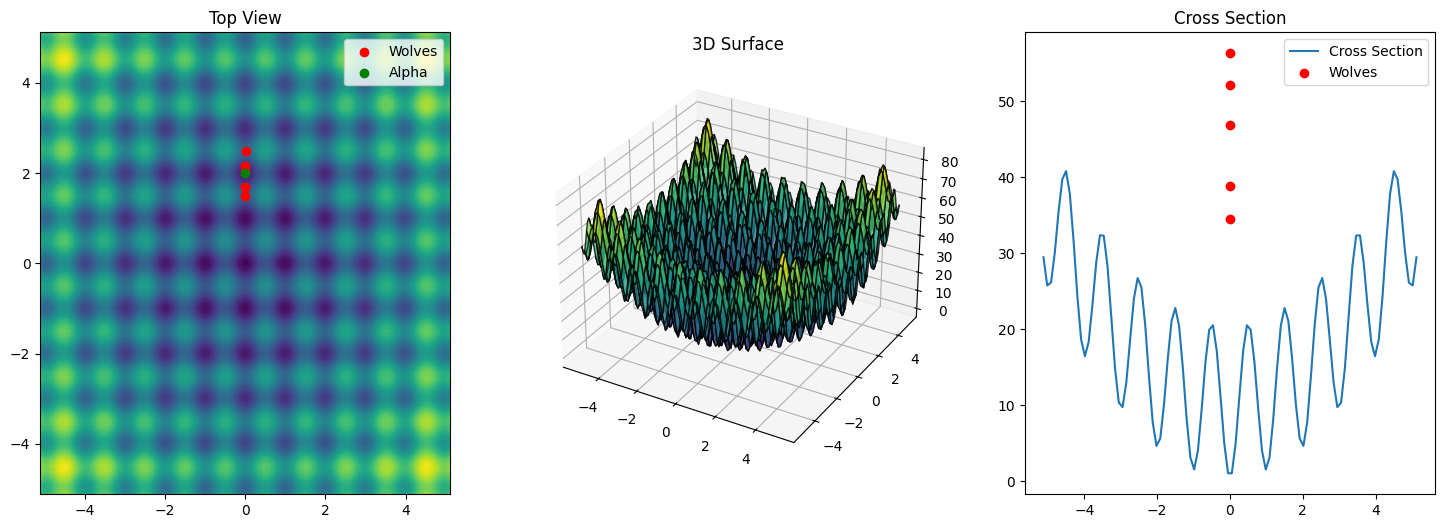

Iterasyon 8
Alpha: [0.00490179 2.04252186], Beta: [0.00445339 2.15186429], Delta: [0.0057731  1.68354245]
Kurt Pozisyonları: [[0.00523013 2.25364392]
 [0.00378668 1.92709266]
 [0.0047963  1.75616305]
 [0.00520302 2.11591603]
 [0.00538663 2.13242892]]


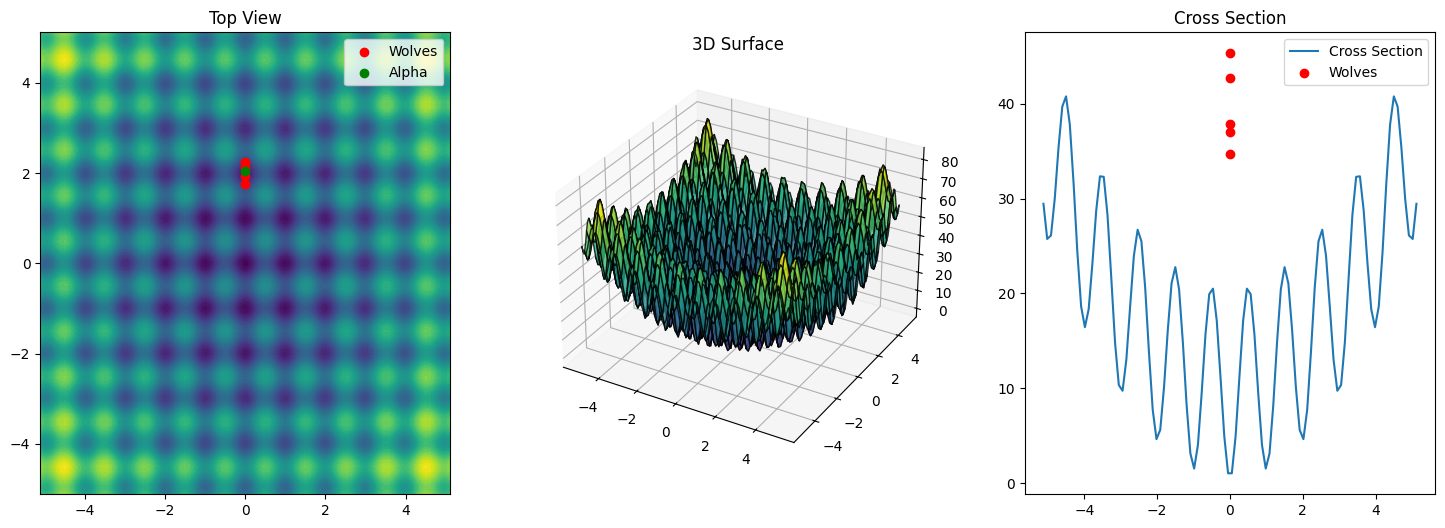

Iterasyon 9
Alpha: [0.00378668 1.92709266], Beta: [0.00520302 2.11591603], Delta: [0.00538663 2.13242892]
Kurt Pozisyonları: [[0.00527087 2.20853495]
 [0.00453944 1.88977587]
 [0.00479398 2.01239485]
 [0.00445319 1.9618444 ]
 [0.0047093  2.02347295]]


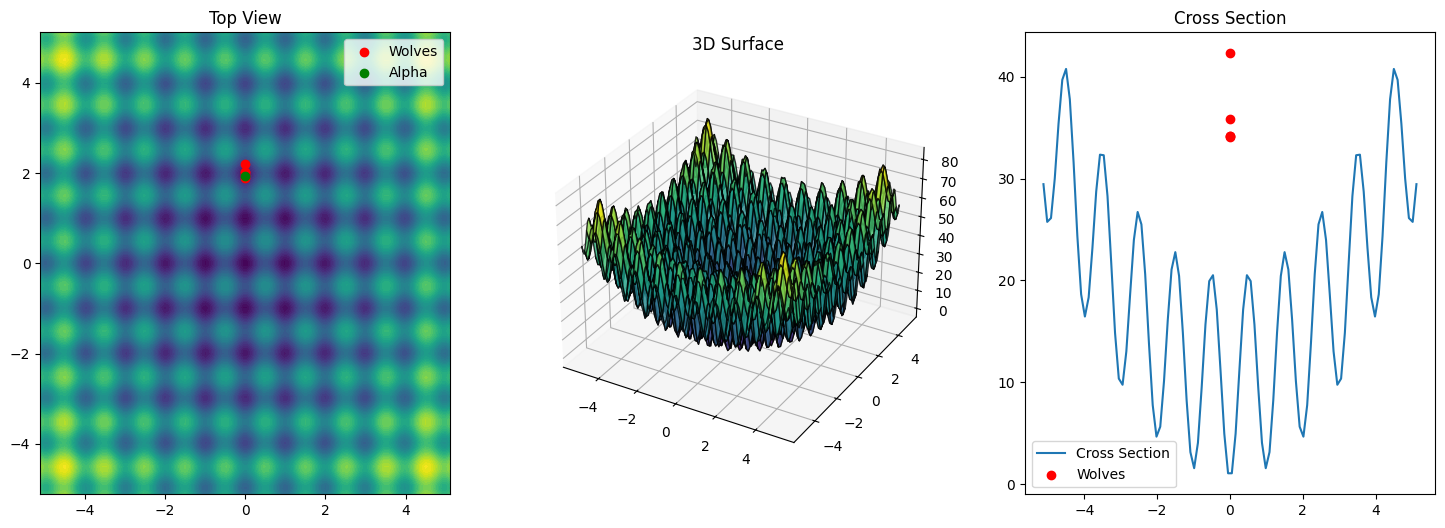

Iterasyon 10
Alpha: [0.00479398 2.01239485], Beta: [0.00445319 1.9618444 ], Delta: [0.0047093  2.02347295]
Kurt Pozisyonları: [[0.0048674  2.08453076]
 [0.00491522 2.11632063]
 [0.0044511  1.91393688]
 [0.00441387 1.90032538]
 [0.00477769 2.05877761]]


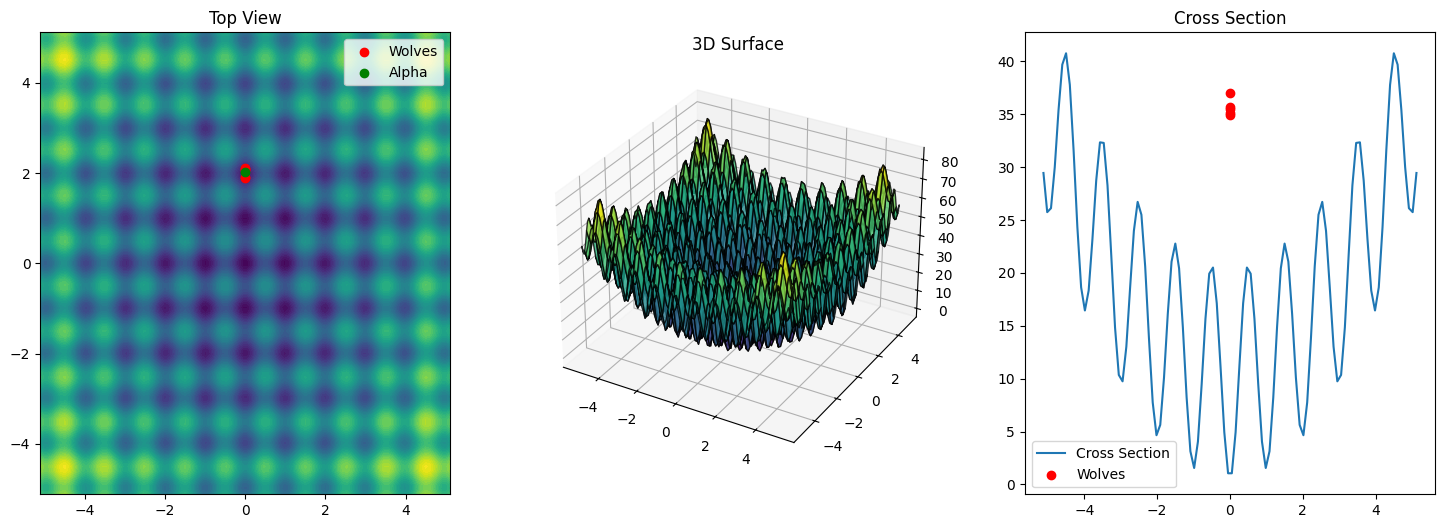

En iyi pozisyon: [1.81850815e-03 2.00774719e+00], En iyi değer: 34.043549743179994


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rastrigin fonksiyonu
def rastrigin_function(x):
    x = np.array(x)
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=1)

# GWO Algoritması
def grey_wolf_optimizer(func, n_wolves=5, n_iterations=10, bounds=(-5.12, 5.12)):
    # Başlangıç popülasyonu (rastgele kurt pozisyonları)
    wolves_positions = np.random.uniform(bounds[0], bounds[1], (n_wolves, 2))  # 2D Rastrigin
    best_alpha_position = None
    best_alpha_value = np.inf

    for iteration in range(n_iterations):
        # Fonksiyon değerlerini hesapla
        fitness = func(wolves_positions)

        # Pozisyonların sıralanması (en iyi kurtları seçiyoruz)
        sorted_indices = np.argsort(fitness)
        alpha, beta, delta = wolves_positions[sorted_indices[:3]]

        # Alpha'nın performansını güncelle
        if fitness[sorted_indices[0]] < best_alpha_value:
            best_alpha_value = fitness[sorted_indices[0]]
            best_alpha_position = alpha.copy()

        # Yeni pozisyonları hesapla
        a = 2 - iteration * (2 / n_iterations)
        new_positions = np.zeros_like(wolves_positions)

        for i in range(n_wolves):
            r1, r2 = np.random.uniform(0, 1, 2)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            r1, r2 = np.random.uniform(0, 1, 2)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            r1, r2 = np.random.uniform(0, 1, 2)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2

            D_alpha = np.abs(C1 * alpha - wolves_positions[i])
            D_beta = np.abs(C2 * beta - wolves_positions[i])
            D_delta = np.abs(C3 * delta - wolves_positions[i])

            X1 = alpha - A1 * D_alpha
            X2 = beta - A2 * D_beta
            X3 = delta - A3 * D_delta

            new_positions[i] = (X1 + X2 + X3) / 3

        # Sınır kontrolü
        wolves_positions = np.clip(new_positions, bounds[0], bounds[1])

        # Her iterasyonda pozisyonları ve lider kurtları yazdır
        print(f"Iterasyon {iteration + 1}")
        print(f"Alpha: {alpha}, Beta: {beta}, Delta: {delta}")
        print(f"Kurt Pozisyonları: {wolves_positions}")

        # Grafikleri çizme
        x = np.linspace(bounds[0], bounds[1], 100)
        y = np.linspace(bounds[0], bounds[1], 100)
        X, Y = np.meshgrid(x, y)
        Z = 10 * 2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))

        fig = plt.figure(figsize=(18, 6))

        # Tepeden görünüm
        ax1 = fig.add_subplot(131)
        ax1.contourf(X, Y, Z, levels=50, cmap="viridis")
        ax1.scatter(wolves_positions[:, 0], wolves_positions[:, 1], color="red", label="Wolves")
        ax1.scatter(alpha[0], alpha[1], color="green", label="Alpha")
        ax1.set_title("Top View")
        ax1.legend()

        # 3D yüzey grafiği
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8, edgecolor="k")
        ax2.scatter(wolves_positions[:, 0], wolves_positions[:, 1], func(wolves_positions), color="red", label="Wolves")
        ax2.set_title("3D Surface")

        # Kesit grafiği (x ekseninde)
        ax3 = fig.add_subplot(133)
        mid_y = len(y) // 2
        ax3.plot(x, Z[mid_y, :], label="Cross Section")
        ax3.scatter(wolves_positions[:, 0], func(wolves_positions), color="red", label="Wolves")
        ax3.set_title("Cross Section")
        ax3.legend()

        plt.show()

    return best_alpha_position, best_alpha_value

# GWO'yu çalıştırma
best_position, best_value = grey_wolf_optimizer(rastrigin_function)
print(f"En iyi pozisyon: {best_position}, En iyi değer: {best_value}")
